# Импорты

In [1]:
from pathlib import Path
import sys

sys.path.append(str(Path.cwd().parent))

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from talib import abstract

from utils.utils import plot_line, plot_bars, time_series_split

# Работа с данными

## Загрузка и предобработка

In [3]:
DATA_PATH = "../data/btcusd_1min.csv"
btc_1m_df = pd.read_csv(DATA_PATH)

In [4]:
print(btc_1m_df.shape)
btc_1m_df.head()

(7189596, 6)


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [5]:
btc_1m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189596 entries, 0 to 7189595
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 329.1 MB


In [6]:
# Проверка NAN в таймштампе
print("Min value:", btc_1m_df['Timestamp'].min())
print("Max value:", btc_1m_df['Timestamp'].max())
print("NaN values:", btc_1m_df['Timestamp'].isna().sum())

Min value: 1325412060.0
Max value: 1756857360.0
NaN values: 0


In [7]:
# Проверка NAN в цене
btc_1m_df[['Open', 'High', 'Low', 'Close', 'Volume']].isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
btc_1m_df['Timestamp'] = pd.to_datetime(btc_1m_df['Timestamp'], unit='s')

In [9]:
# Проверка NAN в таймштампе
print("Min value:", btc_1m_df["Timestamp"].min())
print("Max value:", btc_1m_df["Timestamp"].max())
print("NaN values:", btc_1m_df["Timestamp"].isna().sum())

Min value: 2012-01-01 10:01:00
Max value: 2025-09-02 23:56:00
NaN values: 0


In [10]:
print(btc_1m_df.shape)
print(len(btc_1m_df['Timestamp'].unique()))

(7189596, 6)
7189596


## Первичный анализ

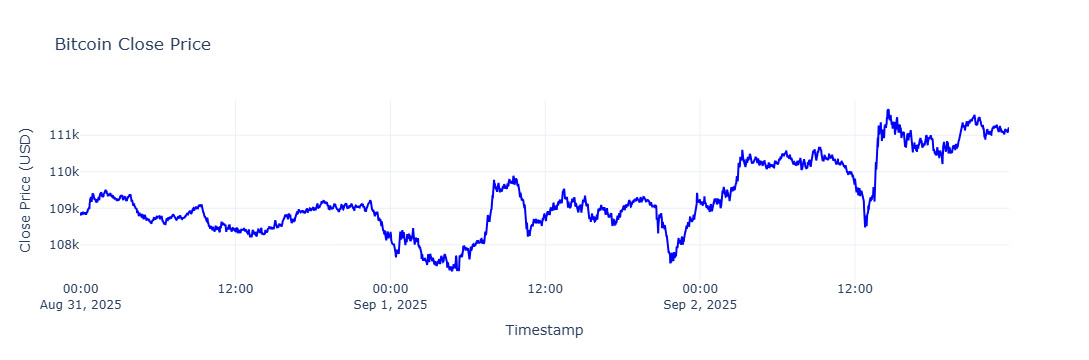

In [11]:
# График закрытия цен за последние 3 дня
fig = plot_line(btc_1m_df, 'Close', slice(-1*60*24*3, None))
fig.show()

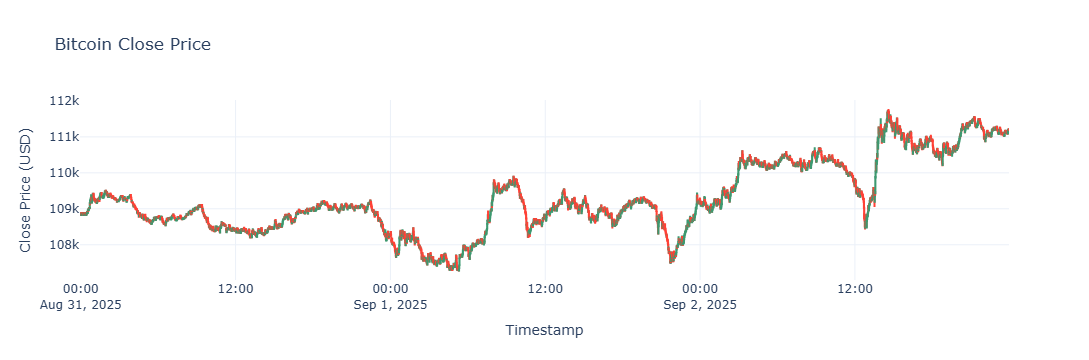

In [12]:
# Свечной график за последние 3 дня
fig = plot_bars(btc_1m_df, slice(-1*60*24*3, None))
fig.show()

## Часовой ТФ

In [13]:
# Ресэмпл в часовой ТФ
btc_1h_df = btc_1m_df.set_index('Timestamp').resample('1h').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

btc_1h_df.reset_index(inplace=True)

In [14]:
print(btc_1h_df.shape)
btc_1h_df.tail()

(119846, 6)


,Timestamp,Open,High,Low,Close,Volume
119841,2025-09-02 19:00:00,110650.0,110857.0,110446.0,110809.0,82.442234
119842,2025-09-02 20:00:00,110808.0,111434.0,110718.0,111431.0,92.092551
119843,2025-09-02 21:00:00,111431.0,111556.0,111147.0,111147.0,49.677046
119844,2025-09-02 22:00:00,111147.0,111284.0,110879.0,111284.0,55.361074
119845,2025-09-02 23:00:00,111284.0,111293.0,111021.0,111198.0,23.945303


In [15]:
# Проверка NAN в таймштампе
print("Min value:", btc_1h_df['Timestamp'].min())
print("Max value:", btc_1h_df['Timestamp'].max())
print("NaN values:", btc_1h_df['Timestamp'].isna().sum())

Min value: 2012-01-01 10:00:00
Max value: 2025-09-02 23:00:00
NaN values: 0


In [16]:
# Проверка NAN в цене
btc_1h_df[['Open', 'High', 'Low', 'Close', 'Volume']].isnull().sum()

Open      18
High      18
Low       18
Close     18
Volume     0
dtype: int64

In [17]:
btc_1h_df[btc_1h_df['Open'].isna()]

,Timestamp,Open,High,Low,Close,Volume
115719,2025-03-15 01:00:00,NaN,NaN,NaN,NaN,0.0
115720,2025-03-15 02:00:00,NaN,NaN,NaN,NaN,0.0
115721,2025-03-15 03:00:00,NaN,NaN,NaN,NaN,0.0
115722,2025-03-15 04:00:00,NaN,NaN,NaN,NaN,0.0
115723,2025-03-15 05:00:00,NaN,NaN,NaN,NaN,0.0
115724,2025-03-15 06:00:00,NaN,NaN,NaN,NaN,0.0
115725,2025-03-15 07:00:00,NaN,NaN,NaN,NaN,0.0
115726,2025-03-15 08:00:00,NaN,NaN,NaN,NaN,0.0
115727,2025-03-15 09:00:00,NaN,NaN,NaN,NaN,0.0
115728,2025-03-15 10:00:00,NaN,NaN,NaN,NaN,0.0


In [18]:
btc_1m_df[
    (btc_1m_df["Timestamp"] > pd.to_datetime("2025-03-14 23:58")) &\
    (btc_1m_df["Timestamp"] < pd.to_datetime("2025-03-15 19:25"))
]

,Timestamp,Open,High,Low,Close,Volume
6943078,2025-03-14 23:59:00,83968.0,83975.0,83968.0,83975.0,0.015713
6943079,2025-03-15 00:00:00,83984.0,84059.0,83984.0,84042.0,0.729731
6943080,2025-03-15 19:21:00,84232.0,84243.0,84232.0,84239.0,0.034330
6943081,2025-03-15 19:22:00,84239.0,84239.0,84203.0,84203.0,0.002986
6943082,2025-03-15 19:23:00,84206.0,84236.0,84206.0,84236.0,0.034242
6943083,2025-03-15 19:24:00,84232.0,84244.0,84232.0,84244.0,0.030788


In [19]:
# Пропуски за 2025-03-15 - удалим их
print(btc_1h_df.shape)
btc_1h_df = btc_1h_df.dropna().reset_index(drop=True)
print(btc_1h_df.shape)
btc_1h_df.tail()

(119846, 6)
(119828, 6)


,Timestamp,Open,High,Low,Close,Volume
119823,2025-09-02 19:00:00,110650.0,110857.0,110446.0,110809.0,82.442234
119824,2025-09-02 20:00:00,110808.0,111434.0,110718.0,111431.0,92.092551
119825,2025-09-02 21:00:00,111431.0,111556.0,111147.0,111147.0,49.677046
119826,2025-09-02 22:00:00,111147.0,111284.0,110879.0,111284.0,55.361074
119827,2025-09-02 23:00:00,111284.0,111293.0,111021.0,111198.0,23.945303


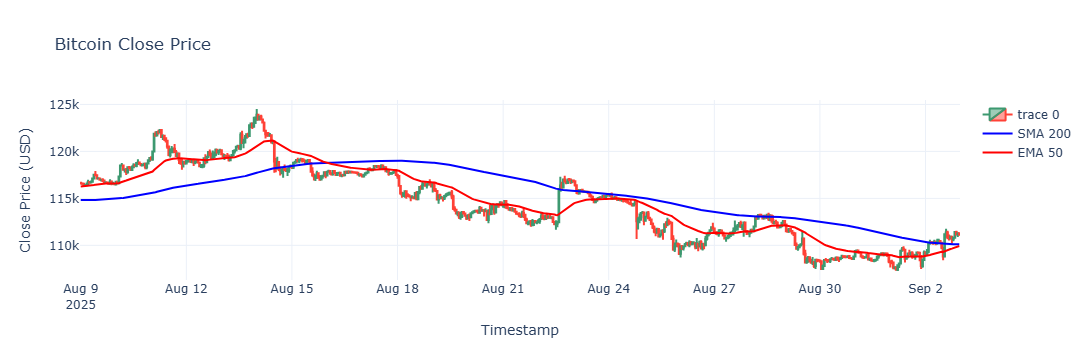

In [20]:
# Свечной график + 2 MA
sma_200 = abstract.SMA(btc_1h_df['Close'], timeperiod=200)
sma_50 = abstract.EMA(btc_1h_df['Close'], timeperiod=50)

slc = slice(-60*10, None)

fig = plot_bars(btc_1h_df, slc, )

fig.add_trace(go.Scatter(
    x=btc_1h_df[slc]['Timestamp'],
    y=sma_200[slc],
    mode='lines',
    name='SMA 200',
    line=dict(color='blue')
))

# SMA 2
fig.add_trace(go.Scatter(
    x=btc_1h_df[slc]['Timestamp'],
    y=sma_50[slc],
    mode='lines',
    name='EMA 50',
    line=dict(color='red')
))

fig.show()

In [25]:
# Сэмплы для репо
btc_1m_df.iloc[:20, :].to_csv('../data/btcusd_1min_sample.csv', index=False)
btc_1h_df.iloc[:20, :].to_csv('../data/btcusd_1hour_sample.csv', index=False)

In [26]:
btc_1h_df.to_csv('../data/btcusd_1hour.csv', index=False)